In [156]:
#Importing datasets

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [157]:
# AIM
# PREDICT MEDIAN HOUSE VALUE USING REGRESSION

In [158]:
#b Data Loading/ Preprocessing(10points)
#bi1
#Reading the dataset 

df = pd.read_csv('housing.csv');
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [159]:
# getting the details of all the columns.

df.info()

# Looking at the columns datatypes there are not mixed values for each column. there are 9 float valued column and 1 categorical valued column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [160]:
#bi2
# Shape of the dataset.

df.shape

(20640, 10)

In [161]:
# Getting if there are any null values.

df.isnull().sum()
#The bedroom column has too many null values.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [162]:
#getting details of the columns having na values 

df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [163]:
#bi3
# the column total_bedrooms has some missing values so dropping the values. 

df.dropna(axis = 'rows', inplace = True)

In [164]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [165]:
df.shape

(20433, 10)

In [166]:
#bi4
#creating dataframe called corr_df by dropping columns latitude, longitude, and ocean_proximity

corr_df = df.drop(['longitude','latitude','ocean_proximity'], axis = 1)

In [167]:
#checking the new df

corr_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [168]:
#correlation of the new dataset 

corr_df.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [169]:
#finding correlation using the dependingupon the 'median_house_value' column

corr_df.corrwith(corr_df['median_house_value'], axis = 0)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

In [170]:
#bi5 
#splitting the original dataframe from the original daraframe df
X = df.drop(['median_house_value'], axis = 1)
Y = df['median_house_value']

In [171]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [172]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

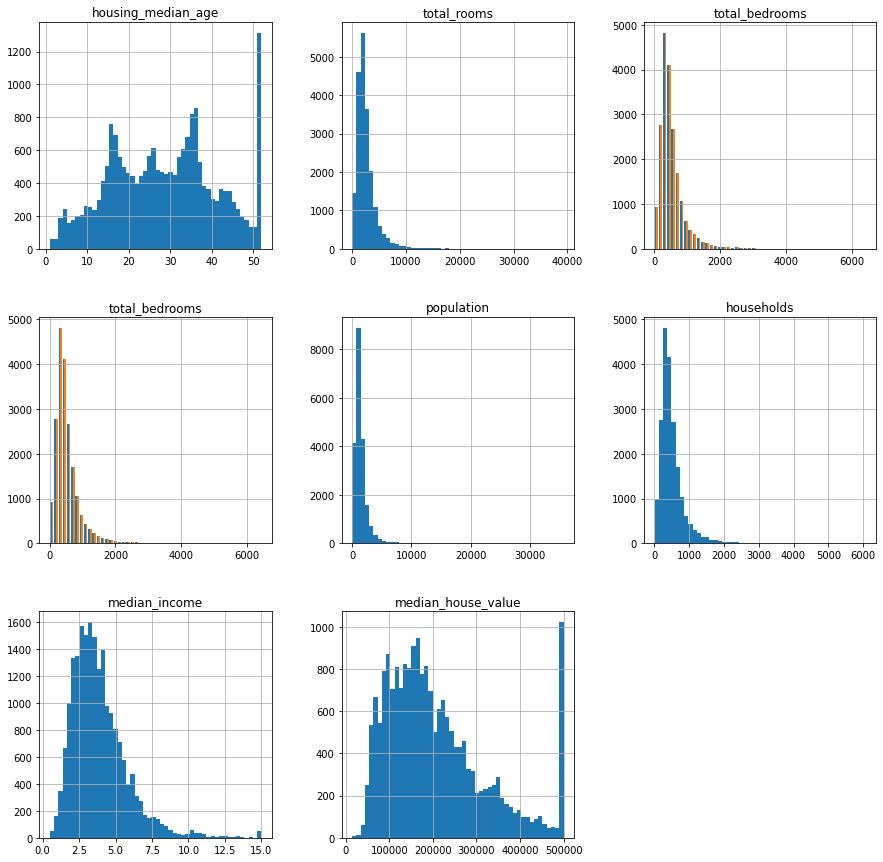

In [173]:
# ii Data Visualization(3 Points)

#bii1

df[['housing_median_age','total_rooms','total_bedrooms','total_bedrooms','population','households','median_income','median_house_value']].hist(figsize = (15,15), bins = 50);




In [174]:
#bii2

df.describe()

#mean = housing_median_age = 28.633094, total_rooms = 2636.504233, total_bedrooms = 537.870553
#mean = population = 1424.946949, households = 499.433465, median_income = 3.871162, median_house_value = 206864.413155


#median = housing_median_age = 29.000000, total_rooms = 2127.000000, total_bedrooms = 435.000000
#median = population = 1166.000000, households = 409.000000, median_income = 3.536500, median_house_value = 179700


#std = housing_median_age = 12.591805, total_rooms = 2185.269567, total_bedrooms = 421.385070
#std = population = 1133.208490, households = 382.299226, median_income = 1.899291, median_house_value = 115435.667099

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [175]:
#bii3

ocean_proximity_dummies = pd.get_dummies(X['ocean_proximity'])
ocean_proximity_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [176]:
#adding the dummies to the dataframe

X.drop('ocean_proximity',inplace = True, axis = 1)

In [177]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [178]:
X = pd.concat([X,ocean_proximity_dummies], axis = 1)

In [179]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [180]:
#iii Spllitting data(2points)
#iv Datascaling(3marks)

X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [181]:
#dropping the logitude and latitude columns as it dosent contribute for the model 
X.drop(['longitude','latitude'], axis = 1, inplace = True)

In [182]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [183]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [184]:

# Splitting the data into train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [185]:
X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,20.0,961.0,278.0,525.0,254.0,3.1838,0,0,0,0,1
16383,2.0,6403.0,1116.0,3327.0,957.0,4.4871,0,1,0,0,0
7731,31.0,3731.0,853.0,2313.0,801.0,3.2237,1,0,0,0,0
1410,30.0,1260.0,276.0,707.0,221.0,2.8920,0,0,0,1,0
1335,4.0,2171.0,597.0,928.0,461.0,4.1016,0,1,0,0,0


In [186]:
#iv Datascaling(3marks)

In [187]:
#imported scaler in top
#initilizing standard scaler class
scaler = StandardScaler()

In [188]:
#as the y is in 1d it cant be scaled so it have to be reshaped
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [189]:
#applying fit_transform on the train  sets

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

In [190]:
#applying fit_transform on the test sets

X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

In [191]:
X_test

array([[-0.69076501, -0.76243721, -0.62221877, ..., -0.02212772,
        -0.34529097,  2.59237401],
       [-2.12068473,  1.69176697,  1.35505614, ..., -0.02212772,
        -0.34529097, -0.38574681],
       [ 0.18307482,  0.48676264,  0.73450327, ..., -0.02212772,
        -0.34529097, -0.38574681],
       ...,
       [ 0.10363484,  0.11064976, -0.08424898, ..., -0.02212772,
        -0.34529097, -0.38574681],
       [ 0.34195479, -0.28079625, -0.38626711, ..., -0.02212772,
        -0.34529097, -0.38574681],
       [ 0.50083476, -0.4652449 , -0.6269378 , ..., -0.02212772,
        -0.34529097, -0.38574681]])

In [192]:
y_test

array([[ 0.3457013 ],
       [-0.58882425],
       [ 0.10665677],
       ...,
       [-1.01754542],
       [-1.11195069],
       [-1.15179145]])

In [193]:
X_train

array([[-0.44520313,  0.39930439,  0.83455132, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [ 0.42830842, -0.18653709,  0.51574174, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-0.12756257,  0.10546251, -0.17184011, ..., -0.01182583,
        -0.35702009, -0.38351632],
       ...,
       [ 1.06358955, -0.47715499, -0.39786183, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-1.31871469,  1.4226847 ,  1.25566546, ..., -0.01182583,
         2.80096282, -0.38351632],
       [ 1.85769097,  0.44766394,  0.4800541 , ..., -0.01182583,
         2.80096282, -0.38351632]])

In [194]:
y_train

array([[-0.98670212],
       [-0.679993  ],
       [ 1.04156353],
       ...,
       [ 1.11000992],
       [ 0.20721077],
       [ 0.38569122]])

Text(0.5, 1.0, 'NEAR OCEAN')

<Figure size 1080x1080 with 0 Axes>

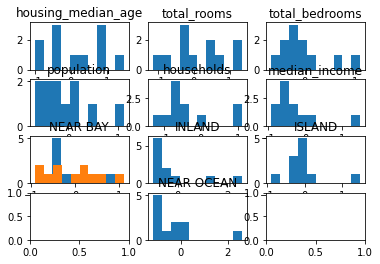

In [263]:
#histogram for the scaled columns

# Initialise the subplot function using number of rows and columns
plt.figure(figsize=(15,15))
figure, axis = plt.subplots(4, 3)

axis[0, 0].hist(X_train[0])
axis[0, 0].set_title("housing_median_age")

axis[0, 1].hist(X_train[1])
axis[0, 1].set_title("total_rooms")

axis[0, 2].hist(X_train[2])
axis[0, 2].set_title("total_bedrooms")

axis[1, 0].hist(X_train[3])
axis[1, 0].set_title("population")

axis[1, 1].hist(X_train[4])
axis[1, 1].set_title("households")

axis[1, 2].hist(X_train[5])
axis[1, 2].set_title("median_income")

axis[2, 0].hist(X_train[6])
axis[2, 0].set_title("<1H OCEAN")

axis[2, 1].hist(X_train[7])
axis[2, 1].set_title("INLAND")

axis[2, 2].hist(X_train[8])
axis[2, 2].set_title("ISLAND")

axis[2, 0].hist(X_train[9])
axis[2, 0].set_title("NEAR BAY")

axis[3, 1].hist(X_train[10])
axis[3, 1].set_title("NEAR OCEAN")

In [252]:
X_train.shape

(14303, 11)

In [195]:
#c. modelling (10 points)
#i. initating the linear model

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [196]:
#ii. fitting the model with X_train and y_train

regression_model.fit(X_train, y_train)


LinearRegression()

In [197]:
#iii. predicting on scaled data

y_preds = regression_model.predict(X_test)

In [198]:
#iv. as the y_preds are scaled converting back to them into normal data

y_preds = scaler.inverse_transform(y_preds)


In [199]:
#printing the original predicted outputs
y_preds

array([[206778.16895221],
       [134249.82007808],
       [209765.14302296],
       ...,
       [150887.63364206],
       [113111.90472478],
       [100759.11849055]])

In [200]:
#v. PCA 3 points
#1
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(n_components=2)

In [201]:
# Eigon values

print(pca.explained_variance_)

[3.88076383 1.75143703]


In [202]:
#eigon vectors

print(pca.components_)

[[-0.22065064  0.48691716  0.49281219  0.47165469  0.49422537  0.04562632
   0.02794901  0.00362896 -0.00549939 -0.04099774 -0.00755816]
 [ 0.20480787  0.00294613 -0.00839947  0.02208312  0.01909075  0.31956536
   0.62977137 -0.67329677  0.00102627  0.05042075 -0.05016521]]


In [203]:
pca1 = pca.components_

In [204]:
#pca component 1
pca1[0]

array([-0.22065064,  0.48691716,  0.49281219,  0.47165469,  0.49422537,
        0.04562632,  0.02794901,  0.00362896, -0.00549939, -0.04099774,
       -0.00755816])

In [209]:
#pca component 2
pca1[1]

array([ 0.20480787,  0.00294613, -0.00839947,  0.02208312,  0.01909075,
        0.31956536,  0.62977137, -0.67329677,  0.00102627,  0.05042075,
       -0.05016521])

Text(0, 0.5, 'PCA 2nd component')

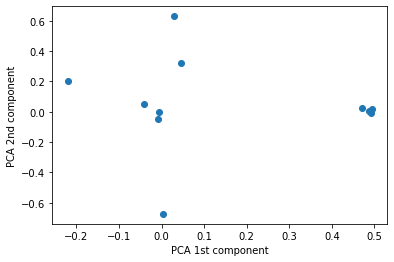

In [211]:
plt.scatter(x=pca1[0],y=pca1[1])
plt.xlabel('PCA 1st component')
plt.ylabel('PCA 2nd component')

In [214]:
#2 total variance the 2 compoent captured

# Explained variance ratio

print(pca.explained_variance_ratio_)

#components covered 51% of the variance

[0.35277205 0.15921042]


In [216]:
print(pca.singular_values_)

#the strength of pca components are 235.5900 and 158.2689 respectively

[235.59007676 158.26892426]


In [217]:
#d. evaluation (6 points)

#di
#making a dataframe for the y_preds

y_preds_df = pd.DataFrame(y_preds)
y_preds_df.head()

,0
0,206778.168952
1,134249.820078
2,209765.143023
3,187072.059585
4,161973.793588


In [225]:
y_test

array([[ 0.3457013 ],
       [-0.58882425],
       [ 0.10665677],
       ...,
       [-1.01754542],
       [-1.11195069],
       [-1.15179145]])

In [226]:
y_test = scaler.inverse_transform(y_test)

In [227]:
y_test

array([[245800.],
       [137900.],
       [218200.],
       ...,
       [ 88400.],
       [ 77500.],
       [ 72900.]])

In [228]:
y_preds_df.shape

(6130, 1)

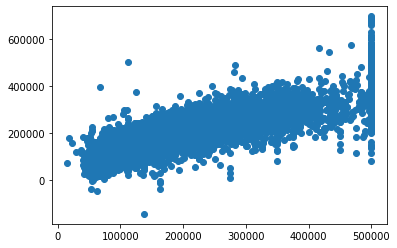

In [229]:
#scatter plot for predicted house values vs actual median house values
plt.scatter(y = y_preds_df, x = y_test)

In [232]:
#dii. 

#MAPE

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_preds_df, y_test)

0.29469371873658284

In [235]:
#RMSE 

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds_df, squared=False)

69126.69854785371

In [234]:
#R2

from sklearn.metrics import r2_score
r2_score(y_test, y_preds_df)

0.6415479206351082

In [238]:
#e. discussion

#i. 

print(regression_model.coef_[0])

[ 0.13240881 -0.14517193  0.32003878 -0.34028448  0.21050278  0.6668176
  0.08409637 -0.19790222  0.02374534  0.06021368  0.09159776]


In [239]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [240]:
# housing_median_age = 0.13240881
# total_rooms = -0.14517193
# total_bedrooms = 0.32003878
# population = -0.34028448
# households = 0.21050278
# median_income = 0.6668176

In [241]:
#continuous variables ranking

#1. median_income
#2. total_bedrooms
#3. households
#4. housing_median_age
#5. total_rooms
#6. population


In [264]:
#ii

# feature selection relies on correlation analysts to determine the best features we should use; which features (independent variables) have the most statistical influence on helping to determine the target variable (dependent variable)

In [265]:
#iii
#MAPE, RMSE AND R SQUARE are the methods to see the performance of the models. each has different method of calculating the score.
# depending upon the case we can use the model. 

In [266]:
#iv. 

#it ensures that the resulting components are only looking at the variance within the dataset and scaling helps to accurately calculate the relationship between the variables
